# Задача о мышах

16 лабораторных мышей были помещены в двухкомнатные клетки, в одной из
комнат висело зеркало. Измерялась доля времени, которое каждая мышь
проводила в каждой из своих двух клеток.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st

In [2]:
# критерий знаков
from statsmodels.stats.descriptivestats import sign_test

# для перестановок
import itertools

# бутстрап
from arch.bootstrap import IIDBootstrap

# перестановочный критерий
from permute.core import one_sample

In [3]:
data = np.loadtxt('./mirror_mice.txt')
data

array([0.3484705, 0.6406202, 0.5498178, 0.5374537, 0.4004438, 0.4262919,
       0.4171558, 0.4779768, 0.4506574, 0.4766018, 0.4886766, 0.4847412,
       0.4816139, 0.4894059, 0.4673653, 0.4673297])

гистограмма:

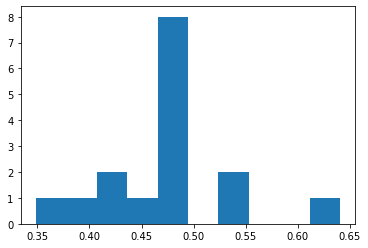

In [9]:
_= plt.hist(data)

Биномиальный тест: ```st.binom_test```

In [5]:
st.binom_test(np.sum(data>=0.5),data.shape[0],  0.5)

0.021270751953125

In [6]:
sign_test(data, mu0=0.5)

(-5.0, 0.021270751953125)

Перестановочный критерий:

In [10]:
one_sample(data-0.5, alternative='two-sided')

ValueError: high is out of bounds for int32

In [11]:
T = (data-0.5)
t=np.sum(T)
t

-0.39537769999999994

In [12]:
list(itertools.combinations(range(16), 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (7, 12),
 (7, 13),
 (7, 14),
 (7, 15),
 (8, 9),
 (8, 10),
 (8, 11),
 (8, 12),
 (8, 13),
 (8, 14),
 (8, 15),
 (9, 10),
 (9, 11),
 (9, 12),
 (9, 13),
 (9, 14),
 (9, 

In [13]:
list(itertools.product([-1, 1], repeat=2))


[(-1, -1), (-1, 1), (1, -1), (1, 1)]

In [14]:
count = 0
good = 0
for v in itertools.product([-1, 1], repeat=16):
    count +=1
    stat = np.dot(T, v)
    if abs(stat)>=abs(t):
        good+=1
    
        
good/count

0.15777587890625

Бутстрап

In [16]:
rs = np.random.RandomState(0)

idx = rs.randint(low=0, high=16, size=(1000, 16))
results = []
for i in idx:
    sample = data[i]
    results.append(sum(sample) / len(sample))
np.percentile(results, [2.5, 97.5])

array([0.44498474, 0.50910533])

In [17]:
bs = IIDBootstrap(data)
bs.conf_int(np.mean, 1000, size=0.9, method='bca')

array([[0.45418713],
       [0.50669265]])